In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import copy
import random

In [2]:
def kalman_filter_univariate(x, P, C, q, r, A, y):
    process_noise = np.random.normal(0, q, 1)
    measurement_noise = np.random.normal(0, r, 1)
    
    x_pred = A * x
    P_pred = A * P * A + q
    
    K = (P_pred * C)/(C * P_pred * C + r)
    x_est = x_pred + K*(y - C * x_pred)
    P_est = (1 - K * C) * P_pred
    
    return x_est, P_est

In [3]:
x0_0 = 0
P0_0 = 1000
C = 1
Q = 0.0001
R = 0.1
A = 1 
y_1 = 0.9


x1_1, P1_1 = kalman_filter_univariate(x0_0, P0_0, C, Q, R, A, y_1)

In [4]:
print(f'The water-level prediction is {round(x1_1, 5)} with uncertainty {round(P1_1, 5)}')

The water-level prediction is 0.89991 with uncertainty 0.09999


In [5]:
x0_0 = 0
P0_0 = 10000
C = 1
Q = 0.0001
R = 0.1
A = 1 
B = 1
u = 0
y_1 = 0.9


x1_1, P1_1 = kalman_filter_univariate(x0_0, P0_0, C, Q, R, A, y_1)

In [6]:
print(f'The water-level prediction is {round(x1_1, 5)} with uncertainty {round(P1_1, 5)}')

The water-level prediction is 0.89999 with uncertainty 0.1


In [7]:
x0_0 = 0
P0_0 = 1000
C = 1
Q = 0.0001
R = 0.1
A = 1 
y_vals = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]

x_cur = x0_0
P_cur = P0_0

true_vals = []
upper_five_percent = []
lower_five_percent = []
x_arr = []
P_arr = []
for y in y_vals:
    x_cur, P_cur = kalman_filter_univariate(x_cur, P_cur, C, Q, R, A, y)
    x_arr.append(x_cur)
    P_arr.append(P_cur)
    true_vals.append(1)
    upper_five_percent.append(1.05)
    lower_five_percent.append(0.95)

In [8]:
time_stamps = list(range(1, len(y_vals) + 1))

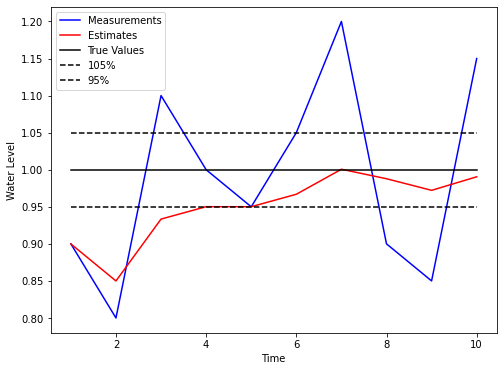

In [9]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(time_stamps, y_vals, label = 'Measurements', color = 'b')
ax.plot(time_stamps, x_arr, label = 'Estimates', color = 'r')
ax.plot(time_stamps, true_vals, label = 'True Values', color = 'k')
ax.plot(time_stamps, upper_five_percent, label = '105%', color = 'k', linestyle = '--')
ax.plot(time_stamps, lower_five_percent, label = '95%', color = 'k', linestyle = '--')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.legend(loc = 'upper left')

In [10]:
x0_0 = 0
P0_0 = 1000
C = 1
Q = 0.0001
R = 0.1
A = 1 
y_vals = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

x_cur = x0_0
P_cur = P0_0

true_vals = []
upper_five_percent = []
lower_five_percent = []
x_arr = []
P_arr = []
true_val = 0
for y in y_vals:
    true_val += 0.1
    x_cur, P_cur = kalman_filter_univariate(x_cur, P_cur, C, Q, R, A, y)
    x_arr.append(x_cur)
    P_arr.append(P_cur)
    true_vals.append(true_val)
    upper_five_percent.append(true_val * 1.05)
    lower_five_percent.append(true_val * 0.95)

In [11]:
time_stamps = list(range(1, len(y_vals) + 1))

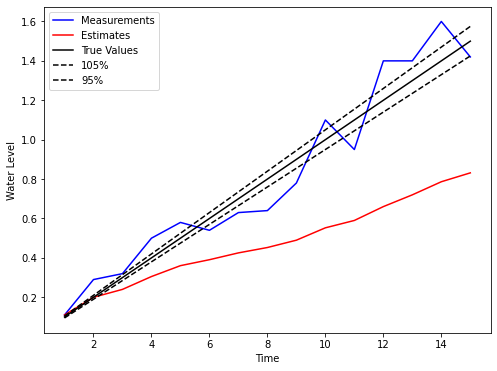

In [12]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(time_stamps, y_vals, label = 'Measurements', color = 'b')
ax.plot(time_stamps, x_arr, label = 'Estimates', color = 'r')
ax.plot(time_stamps, true_vals, label = 'True Values', color = 'k')
ax.plot(time_stamps, upper_five_percent, label = '105%', color = 'k', linestyle = '--')
ax.plot(time_stamps, lower_five_percent, label = '95%', color = 'k', linestyle = '--')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.legend(loc = 'upper left')

In [13]:
x0_0 = 0
P0_0 = 1000
C = 1
Q1 = 0.0001
Q2 = 0.01
Q3 = 0.1
Q4 = 1
R = 0.1
A = 1 
y_vals = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

x1_cur = x0_0
P1_cur = P0_0
x2_cur = x0_0
P2_cur = P0_0
x3_cur = x0_0
P3_cur = P0_0
x4_cur = x0_0
P4_cur = P0_0

true_vals = []
upper_five_percent = []
lower_five_percent = []
x1_arr = []
P1_arr = []
x2_arr = []
P2_arr = []
x3_arr = []
P3_arr = []
x4_arr = []
P4_arr = []
true_val = 0
for y in y_vals:
    true_val += 0.1
    x1_cur, P1_cur = kalman_filter_univariate(x1_cur, P1_cur, C, Q1, R, A, y)
    x1_arr.append(x1_cur)
    P1_arr.append(P1_cur)
    x2_cur, P2_cur = kalman_filter_univariate(x2_cur, P2_cur, C, Q2, R, A, y)
    x2_arr.append(x2_cur)
    P2_arr.append(P2_cur)
    x3_cur, P3_cur = kalman_filter_univariate(x3_cur, P3_cur, C, Q3, R, A, y)
    x3_arr.append(x3_cur)
    P3_arr.append(P3_cur)
    x4_cur, P4_cur = kalman_filter_univariate(x4_cur, P4_cur, C, Q4, R, A, y)
    x4_arr.append(x4_cur)
    P4_arr.append(P4_cur)
    true_vals.append(true_val)
    upper_five_percent.append(true_val * 1.05)
    lower_five_percent.append(true_val * 0.95)

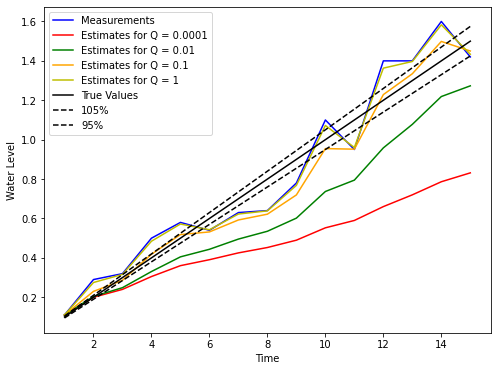

In [14]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(time_stamps, y_vals, label = 'Measurements', color = 'b')
ax.plot(time_stamps, x1_arr, label = 'Estimates for Q = 0.0001', color = 'r')
ax.plot(time_stamps, x2_arr, label = 'Estimates for Q = 0.01', color = 'g')
ax.plot(time_stamps, x3_arr, label = 'Estimates for Q = 0.1', color = 'orange')
ax.plot(time_stamps, x4_arr, label = 'Estimates for Q = 1', color = 'y')
ax.plot(time_stamps, true_vals, label = 'True Values', color = 'k')
ax.plot(time_stamps, upper_five_percent, label = '105%', color = 'k', linestyle = '--')
ax.plot(time_stamps, lower_five_percent, label = '95%', color = 'k', linestyle = '--')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.legend(loc = 'upper left')

In [15]:
def kalman_filter_multivariate(x, P, C, q, r, A, y):
    x_pred = A @ x
    P_pred = A @ P @ A.T + q
    
    K = P_pred @ C @ np.linalg.inv(C.T @ P_pred @ C + r)
    x_est = x_pred + K @ (y - C.T @ x_pred)
    P_est = (np.identity(2) - K @ C.T) @ P_pred
    
    return x_est, P_est

In [16]:
x0_0 = np.array([[0], [0]])
P0_0 = np.array([[1000, 0], [0, 1000]])
C = np.array([[1], [1]])
q = 0.0001
Q = np.array([[q/3, q/2], [q/2, q]])
R = 0.1
dt = 1
A = np.array([[1, dt], [0, 1]])
y_vals = [0.11, 0.29, 0.32, 0.50, 0.58, 0.54, 0.63, 0.64, 0.78, 1.1, 0.95, 1.4, 1.4, 1.6, 1.42]

x_cur = x0_0
P_cur = P0_0

true_vals = []
upper_five_percent = []
lower_five_percent = []
x_arr = []
P_arr = []
true_val = 0
for y in y_vals:
    true_val += 0.1
    x_cur, P_cur = kalman_filter_multivariate(x_cur, P_cur, C, Q, R, A, y)
    x_arr.append(x_cur[0])
    P_arr.append(P_cur)
    true_vals.append(true_val)
    upper_five_percent.append(true_val * 1.05)
    lower_five_percent.append(true_val * 0.95)

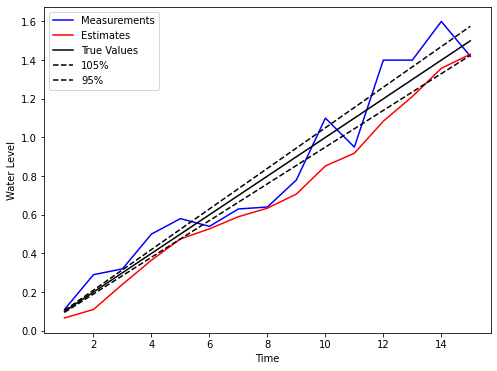

In [17]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(time_stamps, y_vals, label = 'Measurements', color = 'b')
ax.plot(time_stamps, x_arr, label = 'Estimates', color = 'r')
ax.plot(time_stamps, true_vals, label = 'True Values', color = 'k')
ax.plot(time_stamps, upper_five_percent, label = '105%', color = 'k', linestyle = '--')
ax.plot(time_stamps, lower_five_percent, label = '95%', color = 'k', linestyle = '--')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.legend(loc = 'upper left')

## 

In [18]:
def measurement_gen(C, x_true, R):
    y = []
    for x in x_true:
        y.append(np.round(C.T @ x + np.random.normal(0, R, 1), 2))
    
    return y

In [19]:
x_true = np.array([[0.1, 0.1],
                  [0.2, 0.1],
                  [0.3, 0.1],
                  [0.4, 0.1],
                  [0.5, 0.1],
                  [0.6, 0.1],
                  [0.7, 0.1],
                  [0.8, 0.1],
                  [0.9, 0.1],
                  [1, 0],
                  [1, 0],
                  [1, 0],
                  [1, 0],
                  [1, 0],
                  [1, 0]])

In [20]:
x0_0 = np.array([[0], [0]])
P0_0 = np.array([[1000, 0], [0, 1000]])
C = np.array([[1], [1]])
q = 0.01
Q = np.array([[q/3, q/2], [q/2, q]])
R = 0.1
dt = 1
A = np.array([[1, dt], [0, 1]])
y_vals = measurement_gen(C, x_true, R)

x_cur = x0_0
P_cur = P0_0

true_vals = []
upper_five_percent = []
lower_five_percent = []
x_arr = []
P_arr = []
true_val = 0
for i, y in enumerate(y_vals):
    x_cur, P_cur = kalman_filter_multivariate(x_cur, P_cur, C, Q, R, A, y)
    x_arr.append(x_cur[0])
    P_arr.append(P_cur)
    true_vals.append(x_true[i][0])
    upper_five_percent.append(x_true[i][0] * 1.05)
    lower_five_percent.append(x_true[i][0] * 0.95)

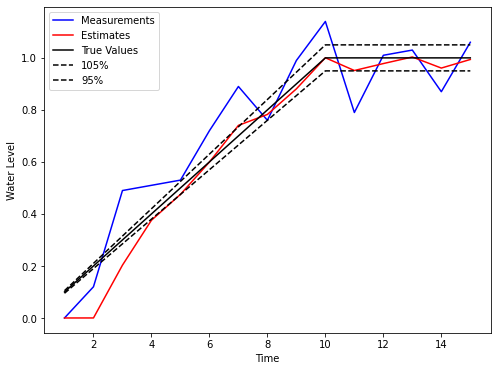

In [21]:
fig, ax = plt.subplots(figsize=[8,6])
ax.plot(time_stamps, y_vals, label = 'Measurements', color = 'b')
ax.plot(time_stamps, x_arr, label = 'Estimates', color = 'r')
ax.plot(time_stamps, true_vals, label = 'True Values', color = 'k')
ax.plot(time_stamps, upper_five_percent, label = '105%', color = 'k', linestyle = '--')
ax.plot(time_stamps, lower_five_percent, label = '95%', color = 'k', linestyle = '--')
ax.set_xlabel('Time')
ax.set_ylabel('Water Level')
ax.legend(loc = 'upper left')